<h1>Indexación Espacial con R-tree<br><small>Caso de estudio: OSMnx y Geopandas</small><br></h1>

In [9]:
import osmnx as ox

norte = ox.gdf_from_places([
    'Comas, Lima, Perú',
    'Ancón, Lima, Perú',
    'Carabayllo, Lima, Perú',
    'San Martín de Porres, Lima, Perú'
])

,bbox_east,bbox_north,bbox_south,bbox_west,geometry,place_name
0,-76.987955,-11.887610,-11.977123,-77.073483,"POLYGON ((-77.0734832 -11.9183677, -77.0733675...","Comas, Lima, Perú"
1,-77.004891,-11.572436,-11.820664,-77.199213,"POLYGON ((-77.19921290000001 -11.6937187, -77....","Ancón, Lima, Perú"
2,-76.804868,-11.680009,-11.910078,-77.093084,"POLYGON ((-77.09308369999999 -11.8087135, -77....","Carabayllo, Lima, LIMA 06, Perú"
3,-77.043470,-11.934311,-12.038937,-77.128429,"POLYGON ((-77.1284289 -11.9383955, -77.1275384...","San Martín de Porres, Lima, Perú"


In [2]:
# Este es un caso especial debido a:
# https://github.com/gboeing/osmnx/issues/16

independencia = ox.gdf_from_place('Independencia, Lima, Perú', which_result=2)
independencia

,bbox_east,bbox_north,bbox_south,bbox_west,geometry,place_name
0,-77.027642,-11.960678,-12.017312,-77.066168,"POLYGON ((-77.066168 -11.977918, -77.0656309 -...","Independencia, Lima, Perú"


In [3]:
norte = norte.append(independencia, ignore_index=True, verify_integrity=True)

In [4]:
norte

,bbox_east,bbox_north,bbox_south,bbox_west,geometry,place_name
0,-76.987955,-11.887610,-11.977123,-77.073483,"POLYGON ((-77.0734832 -11.9183677, -77.0733675...","Comas, Lima, Perú"
1,-77.004891,-11.572436,-11.820664,-77.199213,"POLYGON ((-77.19921290000001 -11.6937187, -77....","Ancón, Lima, Perú"
2,-76.804868,-11.680009,-11.910078,-77.093084,"POLYGON ((-77.09308369999999 -11.8087135, -77....","Carabayllo, Lima, LIMA 06, Perú"
3,-77.043470,-11.934311,-12.038937,-77.128429,"POLYGON ((-77.1284289 -11.9383955, -77.1275384...","San Martín de Porres, Lima, Perú"
4,-77.027642,-11.960678,-12.017312,-77.066168,"POLYGON ((-77.066168 -11.977918, -77.0656309 -...","Independencia, Lima, Perú"


In [5]:
nortep = ox.project_gdf(norte)

In [6]:
nortep

,bbox_east,bbox_north,bbox_south,bbox_west,geometry,place_name
0,-76.987955,-11.887610,-11.977123,-77.073483,POLYGON ((274169.4185108729 -1318371.089420177...,"Comas, Lima, Perú"
1,-77.004891,-11.572436,-11.820664,-77.199213,POLYGON ((260274.4105675218 -1293618.836227624...,"Ancón, Lima, Perú"
2,-76.804868,-11.680009,-11.910078,-77.093084,"POLYGON ((271942.6267151651 -1306254.44341046,...","Carabayllo, Lima, LIMA 06, Perú"
3,-77.043470,-11.934311,-12.038937,-77.128429,POLYGON ((268199.6026057471 -1320632.478047614...,"San Martín de Porres, Lima, Perú"
4,-77.027642,-11.960678,-12.017312,-77.066168,"POLYGON ((275015.674265303 -1324954.014504894,...","Independencia, Lima, Perú"


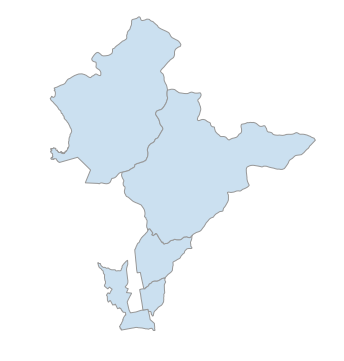

(<matplotlib.figure.Figure at 0x7f1046670dd8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f1046670f60>)

In [7]:
ox.plot_shape(norte)

In [8]:
# Este es un caso especial debido a:
# https://github.com/gboeing/osmnx/issues/16

independencia_streets = ox.graph_from_place('Independencia, Lima, Perú', which_result=2, network_type='street')
independencia_streets

ValueError: unknown network_type "street"

In [ ]:
independencia_streets_p = ox.project_graph(independencia_streets)
ox.plot_graph(independencia_streets_p)

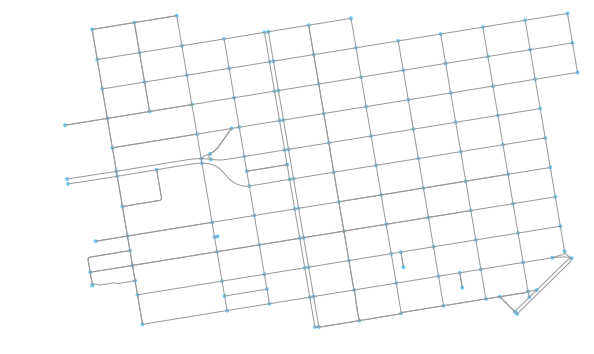

(<matplotlib.figure.Figure at 0x7f1043dd3da0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f1043dd3630>)

In [10]:
-76.987955, -75.987955, -11.977123, -77.073483
G = ox.graph_from_bbox(37.79, 37.78, -122.41, -122.43, network_type='drive')
G_projected = ox.project_graph(G)
ox.plot_graph(G_projected)

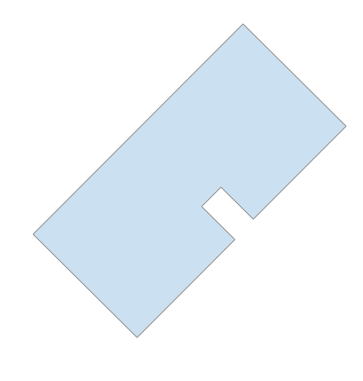

(<matplotlib.figure.Figure at 0x7f1043c6a518>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f10432eb780>)

In [19]:
import osmnx as ox
city = ox.gdf_from_place('Berkeley, CA', which_result=2)
ox.plot_shape(ox.project_gdf(city))